# *Clean modeling*

**Author:** [Kata Ferenc](https://github.com/ferenckata) ([k.t.ferenc@ncmm.uio.no](mailto:k.t.ferenc@ncmm.uio.no))

**Achievement:** Using three different machine learning models predicting diabetes from health data

## Introduction

This notebook is a clean version of the previously seen machine learning notebook. The logic, such as model training and plotting have been moved to functions and built into a package (src/workshop). This lets us focus on the model performance itself.

We trained machine learning models to predict diabetes from health indicators. The dataset used was downloaded from Kaggle [Diabetes Health Indicators](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). This dataset contains 20 columns, each a health indicator from the participants of the survey. The model used here is *support vector machine* from the popular scikit learn package. Two different subset of the data is used for prediction, and different hyperparameters are tested.

# Reproducibility and code formatting

In [1]:
# To watermark the environment
%load_ext watermark

# For automatic code formatting in jupyter lab.
%load_ext lab_black

# For automatic code formatting in jupyter notebook
%load_ext nb_black

# For better logging
%load_ext rich

# Analysis

In [2]:
# Imports
# -------

# System
import sys

# Logging
import logging

# Rich logging in jupyter
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="INFO", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)
log = logging.getLogger("rich")

# Other packages
# Data processing
import pandas as pd

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Custom functions from module
import workshop.model_utils as utils

# Random seed to fix the random generators
RANDOM_SEED = 42

Selecting a few features that we think might be useful

In [3]:
datapath = "../data/train/diabetes_binary_train.csv.zip"
data_in = pd.read_csv(datapath)

In [4]:
features_of_interest = ["Diabetes_binary", "Age", "BMI", "Sex", "HighBP", "HighChol"]
X_train, X_valid, y_train, y_valid = utils.prepare_data(
    data_in, features_of_interest, "Diabetes_binary", 0.2, seed=RANDOM_SEED
)

[18:07:35] INFO     The accuracy on the validation data is 0.69                                  ]8;id=46363;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=399051;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#105\105]8;;\

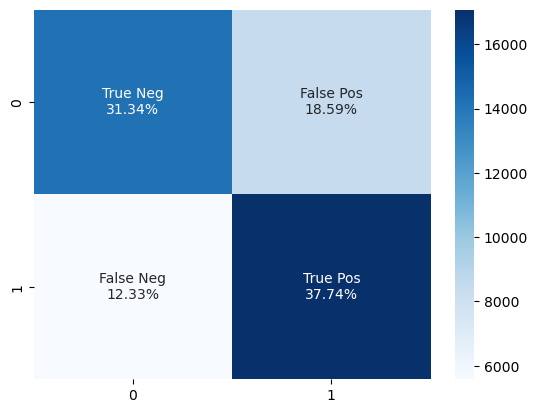

In [5]:
svm_model = SVC(kernel="linear", random_state=RANDOM_SEED)
fitted_svm_model = utils.train_eval_model(svm_model, X_train, y_train)

[18:07:40] INFO     The accuracy on the validation data is 0.69                                  ]8;id=311147;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=98528;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#124\124]8;;\

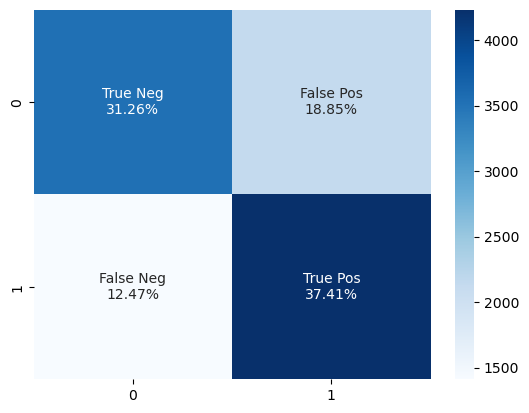

In [6]:
utils.test_eval_model(fitted_svm_model, X_valid, y_valid)

Maybe we can make the model better by providing all features to learn from.

In [7]:
features_of_interest_all = data_in.columns
X_train, X_valid, y_train, y_valid = utils.prepare_data(
    data_in, features_of_interest, "Diabetes_binary", 0.2, seed=RANDOM_SEED
)

[18:09:38] INFO     The accuracy on the validation data is 0.70                                  ]8;id=711466;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=900190;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#105\105]8;;\

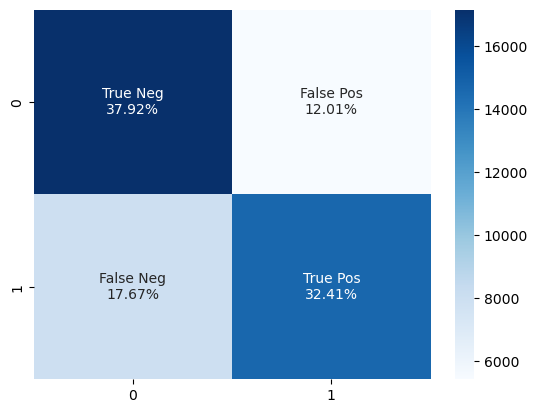

In [8]:
svm_model_lin = SVC(kernel="poly", degree=5, random_state=RANDOM_SEED)
fitted_svm_model_lin = utils.train_eval_model(svm_model_lin, X_train, y_train)

[18:09:44] INFO     The accuracy on the validation data is 0.70                                  ]8;id=599634;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=163483;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#124\124]8;;\

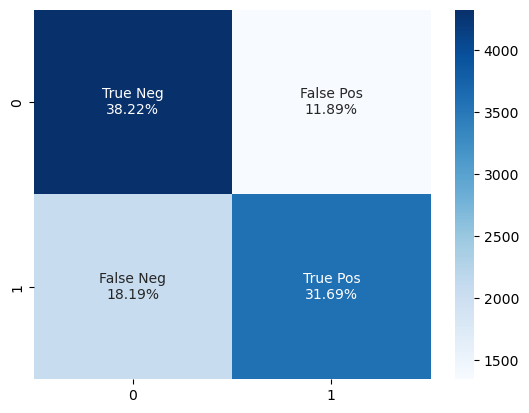

In [9]:
utils.test_eval_model(fitted_svm_model_lin, X_valid, y_valid)

Furthermore, we can train an even more flexible model.

[18:11:42] INFO     The accuracy on the validation data is 0.70                                  ]8;id=973406;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=235666;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#105\105]8;;\

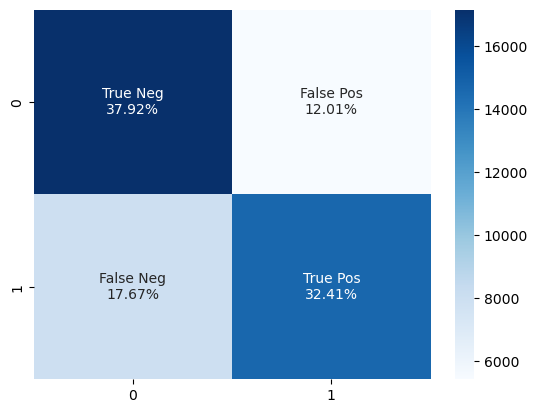

In [10]:
svm_model_poly = SVC(kernel="poly", degree=5, random_state=RANDOM_SEED)
fitted_svm_model_poly = utils.train_eval_model(svm_model_poly, X_train, y_train)

[18:11:48] INFO     The accuracy on the validation data is 0.70                                  ]8;id=447450;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=708295;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#124\124]8;;\

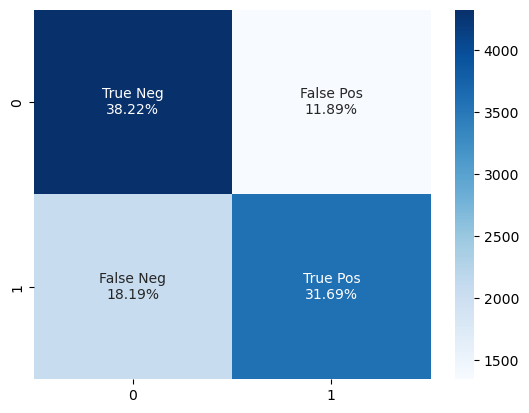

In [11]:
utils.test_eval_model(fitted_svm_model_poly, X_valid, y_valid)

... and an even more flexible model...

[18:13:18] INFO     The accuracy on the validation data is 0.69                                  ]8;id=353429;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=892090;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#105\105]8;;\

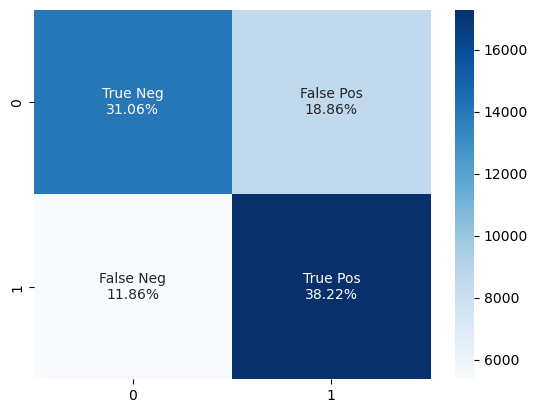

In [12]:
svm_model_rbf = SVC(kernel="rbf", gamma="scale", random_state=RANDOM_SEED)
fitted_svm_model_rbf = utils.train_eval_model(svm_model_rbf, X_train, y_train)

A more flexible model might cause reduced validation accuracy

[18:13:30] INFO     The accuracy on the validation data is 0.69                                  ]8;id=217238;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py\model_utils.py]8;;\:]8;id=197264;file:///home/katalitf/Documents/conferences/NBD_22_workshop/responsible-datascience-ws/src/workshop/model_utils.py#124\124]8;;\

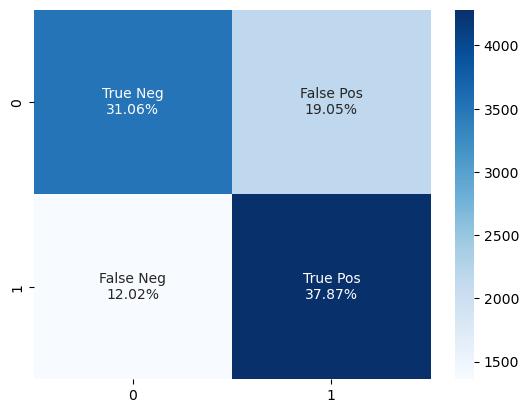

In [13]:
utils.test_eval_model(fitted_svm_model_rbf, X_valid, y_valid)

Incuding more features did not make the model much better. Feature engineering would let us know which features are most important.

### Summary

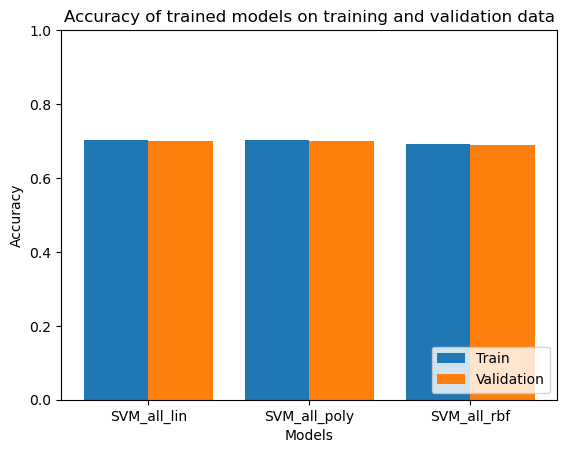

In [14]:
model_list_names = ["SVM_all_lin", "SVM_all_poly", "SVM_all_rbf"]
model_list = [fitted_svm_model_lin, fitted_svm_model_poly, fitted_svm_model_rbf]
utils.compare_models(model_list_names, model_list, X_train, y_train, X_valid, y_valid)

# Watermark

This should be the last section of your notebook, since it watermarks all your environment.

When commiting this notebook, remember to restart the kernel, rerun the notebook and run this cell last, to watermark the environment.

In [15]:
%watermark -gb -iv -m -v

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 7.31.1

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.19.9-200.fc36.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Git hash: ea49738d78d4c40bd08db659ddf9953d814507c8

Git branch: splits_analysis

pandas  : 1.4.3
sys     : 3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 06:04:10) 
[GCC 10.3.0]
workshop: 0.0.1
logging : 0.5.1.2

